In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy as sp
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances
from sklearn.metrics.pairwise import sigmoid_kernel
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Conv1D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras import backend
from keras.layers import Dense
from keras.models import load_model, Sequential
from sklearn.metrics import roc_curve, auc
import keras as keras
from sklearn.metrics import confusion_matrix

# tWZ-ttZ

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy as sp
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances
from sklearn.metrics.pairwise import sigmoid_kernel
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Conv1D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras import backend
from keras.layers import Dense
from keras.models import load_model, Sequential
from sklearn.metrics import roc_curve, auc
import keras as keras
from sklearn.metrics import confusion_matrix

## Importing the data
The tWZ (signal) versus the ttZ (background) datafile is named 'tWZ+ttZ (1).csv' and is imported using the pandas 'read_csv()' function. The data has features and labels and the signal process (tWZ) has a label of 1 and the background process (ttZ) has a label of 0.

In [83]:
df1 = pd.read_csv('ttZ+bkg.csv')#
X1 = df1.drop(['label'], axis=1)
y1 = df1['label']

## Splitting the dataset into training, testing and validation dataset with split (60,20,20)

In [84]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1, train_size=0.6, test_size=0.4, shuffle=True)
X1_test, X1_val, y1_test, y1_val = train_test_split(X1_test,y1_test, train_size=0.5, test_size=0.5, shuffle=True)

In [85]:
scaler1 = StandardScaler()
scaler_train1 = scaler1.fit(X1_train)
X1_train = scaler1.transform(X1_train)
scaler_test1 = scaler1.fit(X1_test)
X1_test = scaler1.transform(X1_test)
scaler_val1 = scaler1.fit(X1_val)
X1_val = scaler1.transform(X1_val)

## Defining the Model

In [86]:
callback = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.5,
    patience=0,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

model = Sequential()
model.add(Dense(30, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'mae'])
history1 = model.fit(X1_train, y1_train, epochs=50, validation_data=(X1_val, y1_val), callbacks=None)
model.summary()

Epoch 1/50
376/376 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7729 - loss: 0.4542 - mae: 0.3175 - val_accuracy: 0.8780 - val_loss: 0.2500 - val_mae: 0.1548
Epoch 2/50
376/376 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8876 - loss: 0.2413 - mae: 0.1526 - val_accuracy: 0.8890 - val_loss: 0.2327 - val_mae: 0.1431
Epoch 3/50
376/376 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8936 - loss: 0.2225 - mae: 0.1412 - val_accuracy: 0.8910 - val_loss: 0.2285 - val_mae: 0.1429
Epoch 4/50
376/376 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8982 - loss: 0.2121 - mae: 0.1362 - val_accuracy: 0.8938 - val_loss: 0.2209 - val_mae: 0.1391
Epoch 5/50
376/376 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8974 - loss: 0.2152 - mae: 0.1382 - val_accuracy: 0.8883 - val_loss: 0.2227 - val_mae: 0.1388
Epoch 6/50
376/376 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9046 - loss: 0.2032 - mae: 0.1324 - val_accuracy: 0.8968 - val_loss: 0.2147 - val_mae: 0.1363
Epoch 7/50
376/376 ━━━━━━━━━━━━━━━━━━━━ 

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_64 (Dense)                     │ (None, 30)                  │           1,470 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_65 (Dense)                     │ (None, 40)                  │           1,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_66 (Dense)                     │ (None, 10)                  │             410 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_67 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,395 (36.70 KB)

 Trainable params: 3,131 (12.23 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,264 (24.47 KB)

In [87]:
y_pred1 = model.predict(X1_test)

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [88]:
signal, bg0 = [],[]
j = 0
for index in y1_test.index:
    if y1_test[index] == 0:
        bg0.append(float(y_pred1[j][0]))
    else:
        signal.append(float(y_pred1[j][0]))
    j+=1

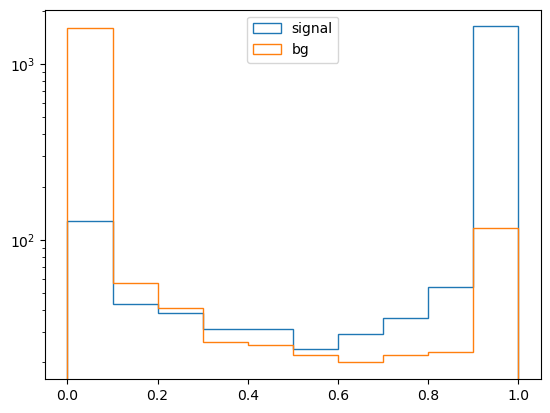

In [89]:
plt.hist(signal, histtype='step', label='signal')
plt.hist(bg0, histtype='step', label='bg')
plt.yscale('log')
plt.legend()

Text(0, 0.5, 'Value')

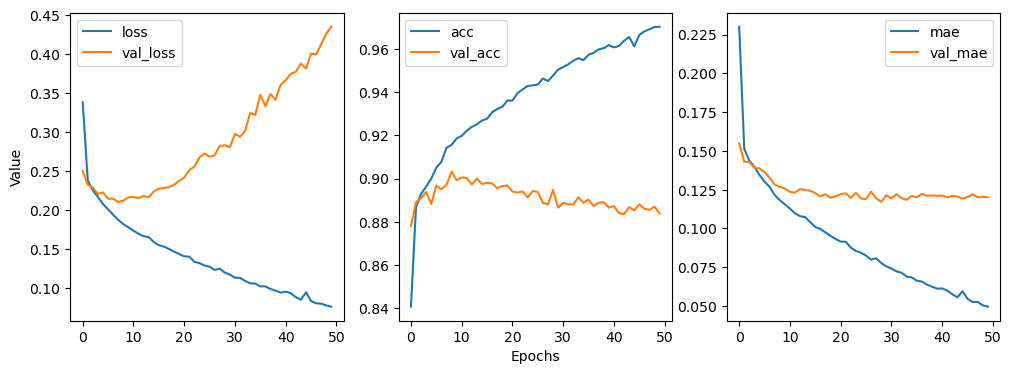

In [90]:
params1 = pd.DataFrame(history1.history)

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,4))

ax1.plot(params1['loss'], label='loss')
ax1.plot(params1['val_loss'], label='val_loss')
ax1.legend()
ax2.plot(params1['accuracy'], label='acc')
ax2.plot(params1['val_accuracy'], label='val_acc')
ax2.legend()
ax3.plot(params1['mae'], label='mae')
ax3.plot(params1['val_mae'], label='val_mae')
ax3.legend()
ax2.set_xlabel("Epochs")
ax1.set_ylabel("Value")

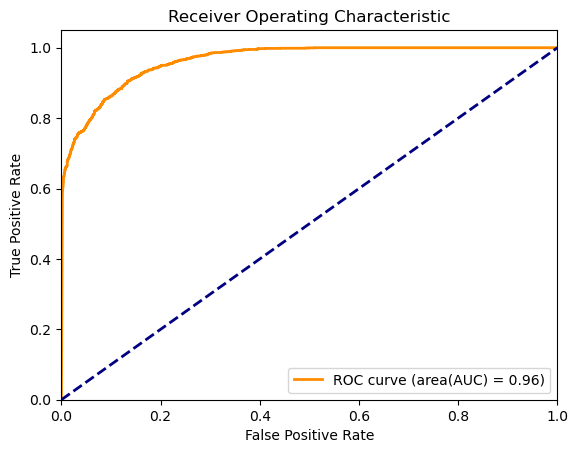

0.963223757026995


In [91]:
fpr, tpr, _ = roc_curve(y1_test, y_pred1)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area(AUC) = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC-AUC-Curves')
plt.show()
print(roc_auc)

# ttZ-vs-Background Classification

## Importing the data
The tWZ (signal) versus the ttZ (background) datafile is named 'tWZ+ttZ (1).csv' and is imported using the pandas 'read_csv()' function. The data has features and labels and the signal process (tWZ) has a label of 1 and the background process (ttZ) has a label of 0.

In [92]:
df2 = pd.read_csv('ttZ+bkg.csv')#
X2 = df2.drop(['label'], axis=1)
y2 = df2['label']

## Splitting the dataset into training, testing and validation dataset with split (60,20,20)

In [93]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2, train_size=0.6, test_size=0.4, shuffle=True)
X2_test, X2_val, y2_test, y2_val = train_test_split(X2_test,y2_test, train_size=0.5, test_size=0.5, shuffle=True)

In [94]:
scaler2 = StandardScaler()
scaler_train2 = scaler2.fit(X2_train)
X2_train = scaler2.transform(X2_train)
scaler_test = scaler2.fit(X2_test)
X2_test = scaler2.transform(X2_test)
scaler_val2 = scaler2.fit(X2_val)
X2_val = scaler2.transform(X2_val)

## Defining the Model

In [95]:
history2 = model.fit(X2_train, y2_train, epochs=50, validation_data=(X2_val, y2_val), callbacks=None)
model.summary()

Epoch 1/50
376/376 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9285 - loss: 0.2214 - mae: 0.0898 - val_accuracy: 0.9350 - val_loss: 0.1675 - val_mae: 0.0916
Epoch 2/50
376/376 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9390 - loss: 0.1532 - mae: 0.0875 - val_accuracy: 0.9250 - val_loss: 0.1830 - val_mae: 0.0986
Epoch 3/50
376/376 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9439 - loss: 0.1388 - mae: 0.0845 - val_accuracy: 0.9245 - val_loss: 0.1729 - val_mae: 0.0949
Epoch 4/50
376/376 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9489 - loss: 0.1295 - mae: 0.0802 - val_accuracy: 0.9213 - val_loss: 0.1826 - val_mae: 0.0980
Epoch 5/50
376/376 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9485 - loss: 0.1224 - mae: 0.0774 - val_accuracy: 0.9230 - val_loss: 0.1781 - val_mae: 0.0955
Epoch 6/50
376/376 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9485 - loss: 0.1217 - mae: 0.0780 - val_accuracy: 0.9223 - val_loss: 0.1864 - val_mae: 0.0960
Epoch 7/50
376/376 ━━━━━━━━━━━━━━━━━━━━ 

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_64 (Dense)                     │ (None, 30)                  │           1,470 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_65 (Dense)                     │ (None, 40)                  │           1,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_66 (Dense)                     │ (None, 10)                  │             410 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_67 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,395 (36.70 KB)

 Trainable params: 3,131 (12.23 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,264 (24.47 KB)

In [97]:
y_pred2 = model.predict(X2_test)

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [98]:
bg1, bg2 = [],[]
j = 0
for index in y2_test.index:
    if y2_test[index] == 0:
        bg2.append(float(y_pred2[j][0]))
    else:
        bg1.append(float(y_pred2[j][0]))
    j+=1

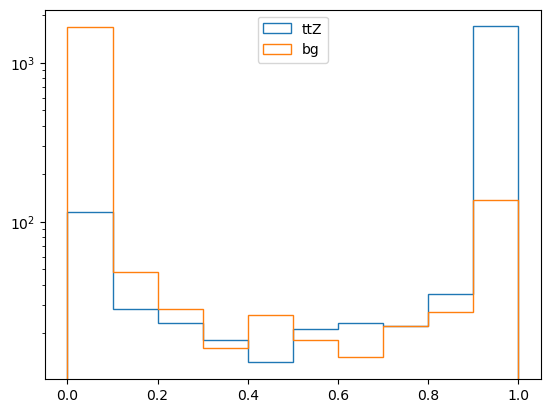

In [99]:
plt.hist(bg1, histtype='step', label='ttZ')
plt.hist(bg2, histtype='step', label='bg')
plt.yscale('log')
plt.legend()

Text(0, 0.5, 'Value')

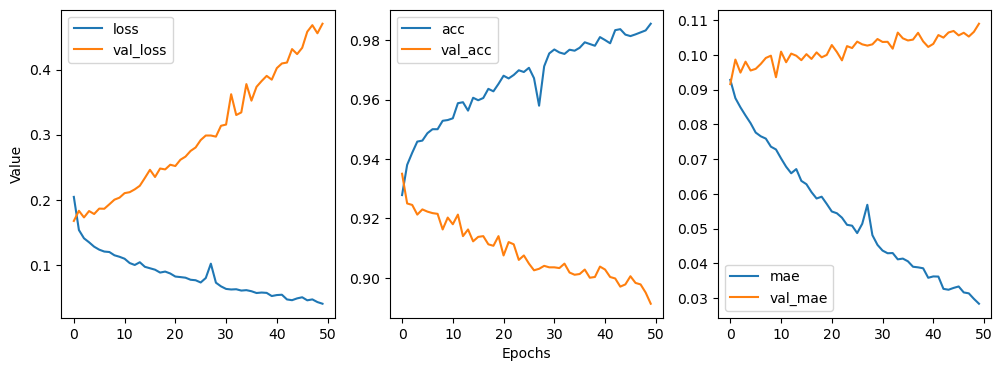

In [100]:
params2 = pd.DataFrame(history2.history)

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,4))

ax1.plot(params2['loss'], label='loss')
ax1.plot(params2['val_loss'], label='val_loss')
ax1.legend()
ax2.plot(params2['accuracy'], label='acc')
ax2.plot(params2['val_accuracy'], label='val_acc')
ax2.legend()
ax3.plot(params2['mae'], label='mae')
ax3.plot(params2['val_mae'], label='val_mae')
ax3.legend()
ax2.set_xlabel("Epochs")
ax1.set_ylabel("Value")

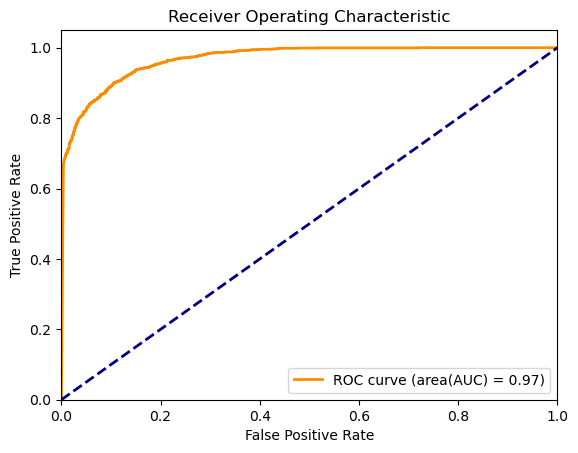

0.967998324905776


In [101]:
fpr, tpr, _ = roc_curve(y2_test, y_pred2)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area(AUC) = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC-AUC-Curves')
plt.show()
print(roc_auc)

# tWZ -vs- All Background

## Importing the data
The tWZ (signal) versus the ttZ (background) datafile is named 'tWZ+ttZ (1).csv' and is imported using the pandas 'read_csv()' function. The data has features and labels and the signal process (tWZ) has a label of 1 and the background process (ttZ) has a label of 0.

In [112]:
df0, df_ = pd.read_csv('ttZ+bkg.csv'), pd.read_csv('tWZ+ttZ (1).csv')#
df = pd.concat([df0, df_])
df = df.dropna()
X = df.drop(['label'], axis=1)
y = df['label']

## Splitting the dataset into training, testing and validation dataset with split (60,20,20)

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.6, test_size=0.4, shuffle=True)
X_test, X_val, y_test, y_val = train_test_split(X_test,y_test, train_size=0.5, test_size=0.5, shuffle=True)

In [108]:
scaler = StandardScaler()
scaler_train = scaler.fit(X_train)
X_train = scaler.transform(X_train)
scaler_test = scaler.fit(X_test)
X_test = scaler.transform(X_test)
scaler_val = scaler2.fit(X_val)
X_val = scaler.transform(X_val)

## Defining the Model

In [130]:
callback = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=0,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

model0 = Sequential()
model0.add(Dense(30, activation='relu'))
model0.add(Dense(40, activation='relu'))
model0.add(Dense(10, activation='relu'))
model0.add(Dense(1, activation='sigmoid'))
model0.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'mae'])
history = model0.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), callbacks=None)
model0.summary()

Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6663 - loss: 0.6073 - mae: 0.4167 - val_accuracy: 0.8002 - val_loss: 0.4256 - val_mae: 0.2851
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7996 - loss: 0.4211 - mae: 0.2805 - val_accuracy: 0.8037 - val_loss: 0.4139 - val_mae: 0.2823
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8022 - loss: 0.4082 - mae: 0.2745 - val_accuracy: 0.8043 - val_loss: 0.4111 - val_mae: 0.2729
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8050 - loss: 0.4013 - mae: 0.2703 - val_accuracy: 0.8058 - val_loss: 0.4096 - val_mae: 0.2677
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8085 - loss: 0.3983 - mae: 0.2670 - val_accuracy: 0.8075 - val_loss: 0.4110 - val_mae: 0.2601
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8143 - loss: 0.3877 - mae: 0.2581 - val_accuracy: 0.7935 - val_loss: 0.4210 - val_mae: 0.2842
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 

Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_92 (Dense)                     │ (32, 30)                    │           1,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_93 (Dense)                     │ (32, 40)                    │           1,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_94 (Dense)                     │ (32, 10)                    │             410 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_95 (Dense)                     │ (32, 1)                     │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,485 (37.05 KB)

 Trainable params: 3,161 (12.35 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,324 (24.71 KB)

In [131]:
y_pred = model0.predict(X_test)

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [128]:
signal, bg = [],[]
j = 0
for index in y_test.index:
    if y_test[index] == 0:
        bg.append(float(y_pred[j][0]))
    else:
        signal.append(float(y_pred[j][0]))
    j+=1

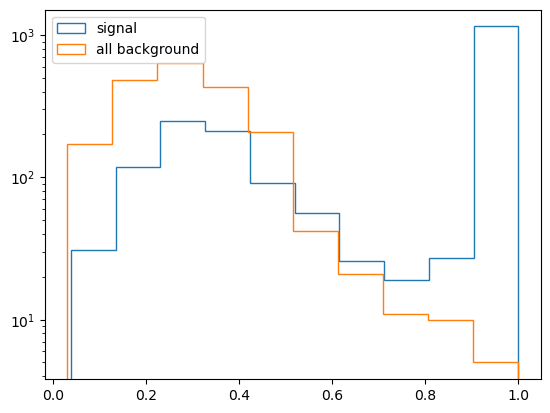

In [129]:
plt.hist(signal, histtype='step', label='signal')
plt.hist(bg, histtype='step', label='all background')
plt.yscale('log')
plt.legend()

Text(0, 0.5, 'Value')

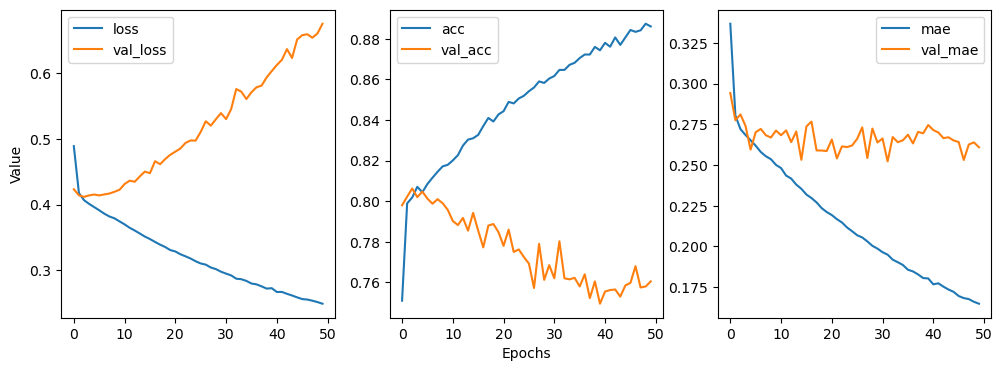

In [117]:
params = pd.DataFrame(history.history)

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,4))

ax1.plot(params['loss'], label='loss')
ax1.plot(params['val_loss'], label='val_loss')
ax1.legend()
ax2.plot(params['accuracy'], label='acc')
ax2.plot(params['val_accuracy'], label='val_acc')
ax2.legend()
ax3.plot(params['mae'], label='mae')
ax3.plot(params['val_mae'], label='val_mae')
ax3.legend()
ax2.set_xlabel("Epochs")
ax1.set_ylabel("Value")

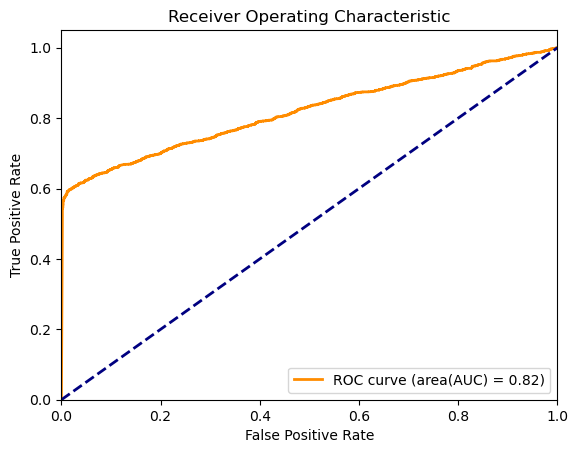

0.8185855079334241


In [118]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area(AUC) = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC-AUC-Curves')
plt.show()
print(roc_auc)